
Sample sizes:
cla: 15,189
nocla: 2,088
uncon: 24,873


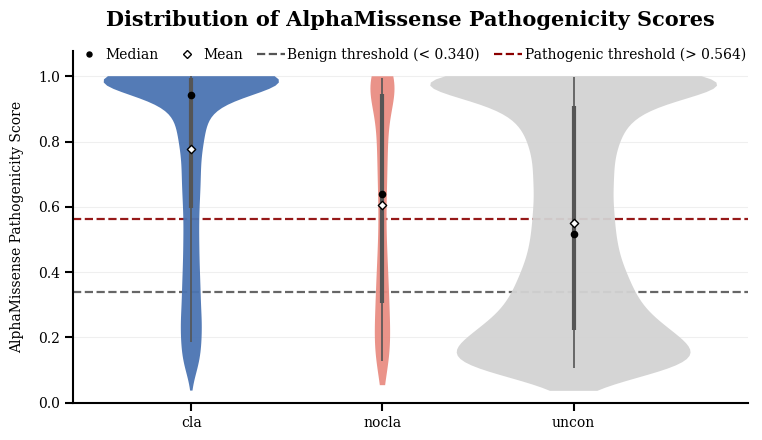


AlphaMissense Pathogenicity Score Statistics by Category

CLA:
  Sample size: 15,189
  Mean ± SD: 0.7776 ± 0.2833
  Median [IQR]: 0.9410 [0.5976-0.9935]
  Range: [0.0374, 1.0000]
  Classification:
    Benign (< 0.340):         2050 ( 13.5%)
    Ambiguous (0.340-0.564):  1530 ( 10.1%)
    Pathogenic (> 0.564):    11609 ( 76.4%)

NOCLA:
  Sample size: 2,088
  Mean ± SD: 0.6064 ± 0.3164
  Median [IQR]: 0.6404 [0.3041-0.9443]
  Range: [0.0540, 0.9997]
  Classification:
    Benign (< 0.340):          603 ( 28.9%)
    Ambiguous (0.340-0.564):   346 ( 16.6%)
    Pathogenic (> 0.564):     1139 ( 54.5%)

UNCON:
  Sample size: 24,873
  Mean ± SD: 0.5493 ± 0.3313
  Median [IQR]: 0.5173 [0.2215-0.9100]
  Range: [0.0366, 1.0000]
  Classification:
    Benign (< 0.340):         9355 ( 37.6%)
    Ambiguous (0.340-0.564):  3765 ( 15.1%)
    Pathogenic (> 0.564):    11753 ( 47.3%)



In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.lines import Line2D

# ========================
# 基本绘图风格
# ========================
import matplotlib as mpl
import matplotlib as mpl
mpl.rcParams['font.family'] = ['DejaVu Serif', 'Liberation Serif', 'Nimbus Roman']  # 依次回退
mpl.rcParams['mathtext.fontset'] = 'stix'  # 让公式也接近 Times 风格


#plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 10
plt.rcParams['axes.linewidth'] = 1.5


#mpl.rcParams['font.family'] = ['Times New Roman', 'Times', 'DejaVu Serif']
mpl.rcParams['font.size'] = 10           # 正文字号
mpl.rcParams['axes.titlesize'] = 15      # 标题
mpl.rcParams['axes.labelsize'] = 10      # 坐标轴标签
mpl.rcParams['legend.fontsize'] = 10
mpl.rcParams['xtick.labelsize'] = 10
mpl.rcParams['ytick.labelsize'] = 10

# ========================
# 输入文件 & 颜色定义
# ========================
csv_files = {
    'cla': "/home/databank_70t/pengziyu/scop/251105/4+1/AM/cla_AMmutations.csv",
    'nocla': "/home/databank_70t/pengziyu/scop/251105/4+1/AM/nocla_AMmutations.csv",
    #'semi-cla': "/home/databank_70t/pengziyu/scop/251105/4+1/AM/half-cla_AMmutations.csv",
    #'semi-nocla': "/home/databank_70t/pengziyu/scop/251105/4+1/AM/half-nocla_AMmutations.csv",
    'uncon': "/home/databank_70t/pengziyu/scop/251105/4+1/AM/uncon_AMmutations.csv"
}

colors = {
    'cla': '#4B74B2',       # 深蓝
    'nocla': '#E98D83',     # 鲜红
    #'semi-cla': '#90BEE0',  # 浅蓝
    #'semi-nocla': '#FFCBAA',# 橙色
    #'uncon': '#E1DF92'      # 浅黄
    'uncon': '#D3D3D3'      # 浅灰
}

# 阈值线颜色（之前的要求）
PATHO_LINE_COLOR = '#8B0000'   # 深红（致病阈值）
BENIGN_LINE_COLOR = '#555555'  # 深灰（良性阈值）

# ========================
# 读取数据
# ========================
#category_order = ['cla', 'nocla', 'semi-cla', 'semi-nocla', 'uncon']
category_order = ['cla', 'nocla', 'uncon']

data_dict = {}
for name, file in csv_files.items():
    df = pd.read_csv(file)
    data_dict[name] = df['AlphaMissense病理性'].values

# 样本量
sample_sizes = {name: len(data) for name, data in data_dict.items()}
max_sample_size = max(sample_sizes.values())

print("\nSample sizes:")
for cat in category_order:
    print(f"{cat}: {sample_sizes[cat]:,}")

# ========================
# 绘图
# ========================
fig, ax = plt.subplots(figsize=(8, 4.5))
positions = np.arange(len(category_order))

for i, cat in enumerate(category_order):
    data = data_dict[cat]

    # 相对宽度（与样本量成比例）
    relative_width = (sample_sizes[cat] / max_sample_size) * 1.5

    # 小提琴
    parts = ax.violinplot(
        [data],
        positions=[i],
        widths=[relative_width],
        showmeans=False,
        showmedians=False,
        showextrema=False
    )
    for pc in parts['bodies']:
        pc.set_facecolor(colors[cat])
        pc.set_alpha(0.95)
        pc.set_edgecolor('none')  # 去掉小提琴包裹外侧黑线
        pc.set_linewidth(0)

    # 统计量
    q1, median, q3 = np.percentile(data, [25, 50, 75])
    whisker_min, whisker_max = np.percentile(data, [5, 95])
    mean_val = data.mean()

    # IQR 粗线：黑色竖线
    ax.vlines(i, q1, q3, color='#555555', linestyle='-', lw=3, zorder=3)

    # 触须：细黑线
    ax.vlines(i, whisker_min, q1, color='#555555', linestyle='-', lw=1.2, zorder=3)
    ax.vlines(i, q3, whisker_max, color='#555555', linestyle='-', lw=1.2, zorder=3)

    # 白色填充 + 黑色边框（最清晰）
    ax.scatter(i, median, color='black', s=20, zorder=4)

    # 均值：深灰菱形
    ax.scatter(i, mean_val,
            facecolor='white', edgecolor='black', linewidth=1.0,
            marker='D', s=18, zorder=4)


# 阈值线
ax.axhline(y=0.340, color=BENIGN_LINE_COLOR, linestyle='--', linewidth=1.6,
           label='Benign threshold (< 0.340)', alpha=0.9, zorder=0)
ax.axhline(y=0.564, color=PATHO_LINE_COLOR, linestyle='--', linewidth=1.6,
           label='Pathogenic threshold (> 0.564)', alpha=0.9, zorder=0)

# 轴标签与标题
#ax.set_xlabel('Category', fontsize=11, fontweight='bold', labelpad=10)
ax.set_xlabel('') 
ax.set_ylabel('AlphaMissense Pathogenicity Score', fontsize=10, fontweight='normal', labelpad=10)
ax.set_title('Distribution of AlphaMissense Pathogenicity Scores',
             fontsize=15, fontweight='bold', pad=18)

# x 轴
ax.set_xticks(positions)
ax.set_xticklabels(category_order, fontsize=10, fontweight='normal')

# y 轴范围
y_min = min([data_dict[cat].min() for cat in category_order])
y_max = max([data_dict[cat].max() for cat in category_order])
y_range = y_max - y_min
lower_limit = max(0, y_min - 0.05 * y_range)
upper_limit = 1.05 if y_max < 0.95 else min(1.15, y_max + 0.08 * y_range)
ax.set_ylim([lower_limit, upper_limit])

# 刻度 & 网格
ax.tick_params(axis='both', which='major', labelsize=10, width=1.5, length=6)
ax.grid(axis='y', alpha=0.2, linestyle='-', linewidth=0.8, zorder=0)
ax.set_axisbelow(True)

# 去除上右边框
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(1.5)
ax.spines['bottom'].set_linewidth(1.5)

# 顶部居中图注（图例）
median_proxy = Line2D([0], [0], marker='o', color='none', markerfacecolor='black', markersize=4, label='Median')
mean_proxy = Line2D([0], [0], marker='D', color='none', markerfacecolor='white', markersize=4, label='Mean')
benign_proxy = Line2D([0], [0], color=BENIGN_LINE_COLOR, lw=1.6, ls='--', label='Benign threshold (< 0.340)')
patho_proxy  = Line2D([0], [0], color=PATHO_LINE_COLOR,  lw=1.6, ls='--', label='Pathogenic threshold (> 0.564)')


# 顶部居中图注（无边框）

legend = ax.legend(
    handles=[median_proxy, mean_proxy, benign_proxy, patho_proxy],
    loc='upper center', bbox_to_anchor=(0.5, 1.05),
    ncol=4.0, fontsize=10, frameon=False, shadow=False, fancybox=False,
    borderpad=0.5, labelspacing=0.8, handlelength=2.0,
    handletextpad=0.2,          # 列标签之间的距离
    columnspacing=1.0,           # 多列之间更紧
    markerscale=0.9              
)

# 给顶部留点空间，防止被裁剪
#plt.tight_layout(rect=(0, 0, 1, 0.95))


legend.get_frame().set_linewidth(0)
legend.get_frame().set_edgecolor('none')  # 去边框

plt.tight_layout()

# 输出高分辨率图片
plt.savefig('alphamissense_violin_plot.png', dpi=600, bbox_inches='tight', facecolor='white')
# plt.savefig('alphamissense_violin_plot.pdf', bbox_inches='tight', facecolor='white')
# plt.savefig('alphamissense_violin_plot.svg', bbox_inches='tight', facecolor='white')
plt.show()

# ========================
# 统计信息输出
# ========================
print("\n" + "="*80)
print("AlphaMissense Pathogenicity Score Statistics by Category")
print("="*80)

for cat in category_order:
    data = data_dict[cat]
    print(f"\n{cat.upper()}:")
    print(f"  Sample size: {len(data):,}")
    print(f"  Mean ± SD: {data.mean():.4f} ± {data.std():.4f}")
    print(f"  Median [IQR]: {np.median(data):.4f} [{np.percentile(data, 25):.4f}-{np.percentile(data, 75):.4f}]")
    print(f"  Range: [{data.min():.4f}, {data.max():.4f}]")

    # 区间计数
    benign = (data < 0.340).sum()
    ambiguous = ((data >= 0.340) & (data <= 0.564)).sum()
    pathogenic = (data > 0.564).sum()

    print(f"  Classification:")
    print(f"    Benign (< 0.340):        {benign:5d} ({benign/len(data)*100:5.1f}%)")
    print(f"    Ambiguous (0.340-0.564): {ambiguous:5d} ({ambiguous/len(data)*100:5.1f}%)")
    print(f"    Pathogenic (> 0.564):    {pathogenic:5d} ({pathogenic/len(data)*100:5.1f}%)")

print("\n" + "="*80)


In [2]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-

import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import matplotlib as mpl
from itertools import combinations
from scipy import stats
from scipy.stats import norm


# =========================
# 0) Tee: 同时打印到终端 + 写log
# =========================
class Tee:
    def __init__(self, *files):
        self.files = files
    def write(self, obj):
        for f in self.files:
            f.write(obj)
            f.flush()
    def flush(self):
        for f in self.files:
            f.flush()


# =========================
# 1) 非参数统计：Kruskal + Dunn + Cliff + Chi2
# =========================
def _clean(x):
    x = np.asarray(x, dtype=float)
    return x[np.isfinite(x)]

def kruskal_with_eps2(data_dict, category_order):
    groups = [_clean(data_dict[g]) for g in category_order]
    H, p = stats.kruskal(*groups, nan_policy="omit")
    n = sum(len(g) for g in groups)
    k = len(groups)
    eps2 = (H - k + 1) / (n - k) if (n > k) else np.nan
    eps2 = max(0.0, eps2) if np.isfinite(eps2) else eps2
    return H, p, eps2

def dunn_posthoc(data_dict, category_order, p_adjust="holm"):
    values = []
    groups = []
    for g in category_order:
        x = _clean(data_dict[g])
        values.append(x)
        groups.append(np.array([g] * len(x), dtype=object))
    x_all = np.concatenate(values)
    g_all = np.concatenate(groups)

    N = len(x_all)
    ranks = stats.rankdata(x_all, method="average")

    # tie 修正
    _, tie_counts = np.unique(x_all, return_counts=True)
    tie_term = np.sum(tie_counts**3 - tie_counts)
    A = (N * (N + 1) / 12.0) - (tie_term / (12.0 * (N - 1))) if N > 1 else np.nan

    mean_rank = {}
    n_group = {}
    for g in category_order:
        mask = (g_all == g)
        mean_rank[g] = ranks[mask].mean()
        n_group[g] = mask.sum()

    results = []
    for a, b in combinations(category_order, 2):
        se = np.sqrt(A * (1.0 / n_group[a] + 1.0 / n_group[b]))
        z = (mean_rank[a] - mean_rank[b]) / se
        p_raw = 2.0 * norm.sf(abs(z))
        results.append((a, b, z, p_raw))

    res_df = pd.DataFrame(results, columns=["group1", "group2", "z", "p_raw"])

    # 多重校正
    m = len(res_df)
    pvals = res_df["p_raw"].values

    if p_adjust.lower() == "holm":
        order = np.argsort(pvals)
        adj = np.empty(m, dtype=float)
        prev = 0.0
        for i, idx in enumerate(order):
            p_adj_i = (m - i) * pvals[idx]
            p_adj_i = min(1.0, p_adj_i)
            p_adj_i = max(prev, p_adj_i)  # 单调
            adj[idx] = p_adj_i
            prev = p_adj_i
        res_df["p_adj"] = adj

    elif p_adjust.lower() in ["fdr_bh", "bh", "fdr"]:
        order = np.argsort(pvals)
        adj = np.empty(m, dtype=float)
        prev = 1.0
        for i in range(m - 1, -1, -1):
            idx = order[i]
            rank = i + 1
            p_adj_i = pvals[idx] * m / rank
            p_adj_i = min(prev, p_adj_i, 1.0)
            adj[idx] = p_adj_i
            prev = p_adj_i
        res_df["p_adj"] = adj
    else:
        res_df["p_adj"] = res_df["p_raw"]

    return res_df.sort_values("p_adj").reset_index(drop=True)

def cliffs_delta(x, y):
    x = _clean(x); y = _clean(y)
    x_sorted = np.sort(x)
    y_sorted = np.sort(y)
    n, m = len(x_sorted), len(y_sorted)
    if n == 0 or m == 0:
        return np.nan
    # greater: 对每个 x，y 中 < x 的个数
    greater = np.sum(np.searchsorted(y_sorted, x_sorted, side="left"))
    # less: 对每个 x，y 中 > x 的个数
    less = np.sum(m - np.searchsorted(y_sorted, x_sorted, side="right"))
    return float((greater - less) / (n * m))

def pairwise_cliffs(data_dict, category_order):
    rows = []
    for a, b in combinations(category_order, 2):
        rows.append((a, b, cliffs_delta(data_dict[a], data_dict[b])))
    return pd.DataFrame(rows, columns=["group1", "group2", "cliffs_delta"])

def chi_square_thresholds(data_dict, category_order, benign_thr=0.340, patho_thr=0.564):
    table = []
    for g in category_order:
        x = _clean(data_dict[g])
        benign = int(np.sum(x < benign_thr))
        ambiguous = int(np.sum((x >= benign_thr) & (x <= patho_thr)))
        patho = int(np.sum(x > patho_thr))
        table.append([benign, ambiguous, patho])

    table = np.array(table, dtype=int)
    chi2, p, dof, expected = stats.chi2_contingency(table, correction=False)

    n = table.sum()
    r, c = table.shape
    cramer_v = np.sqrt((chi2 / n) / (min(r - 1, c - 1))) if n > 0 else np.nan

    df_table = pd.DataFrame(
        table,
        index=category_order,
        columns=[f"Benign(<{benign_thr})", f"Amb({benign_thr}-{patho_thr})", f"Patho(>{patho_thr})"]
    )
    return chi2, p, dof, cramer_v, df_table

def run_all_tests(data_dict, category_order):
    print("Groups:", category_order)
    for g in category_order:
        x = _clean(data_dict[g])
        print(f"  {g}: n={len(x):,}  mean={x.mean():.4f}  sd={x.std():.4f}  median={np.median(x):.4f}")

    print("\n[1] Kruskal–Wallis")
    H, p, eps2 = kruskal_with_eps2(data_dict, category_order)
    print(f"  H = {H:.6f}, p = {p:.3e}, epsilon^2 = {eps2:.6f}")

    print("\n[2] Post-hoc: Dunn test (Holm adjusted)")
    dunn_df = dunn_posthoc(data_dict, category_order, p_adjust="holm")
    print(dunn_df.to_string(index=False))

    print("\n[3] Effect size: Cliff's delta (pairwise)")
    cliff_df = pairwise_cliffs(data_dict, category_order)
    print(cliff_df.to_string(index=False))

    print("\n[4] Threshold categories: Chi-square + Cramér’s V")
    chi2, p2, dof, v, table_df = chi_square_thresholds(data_dict, category_order)
    print(table_df.to_string())
    print(f"  chi2 = {chi2:.6f}, dof = {dof}, p = {p2:.3e}, Cramér’s V = {v:.6f}")

    return {
        "kruskal": (H, p, eps2),
        "dunn": dunn_df,
        "cliffs": cliff_df,
        "chi2": (chi2, p2, dof, v),
        "chi2_table": table_df
    }


# =========================
# 2) 主程序：读数据 + 画图 + 统计
# =========================
def main():
    # ---- 绘图风格（沿用你的设置） ----
    mpl.rcParams['font.family'] = ['DejaVu Serif', 'Liberation Serif', 'Nimbus Roman']
    mpl.rcParams['mathtext.fontset'] = 'stix'
    mpl.rcParams['font.size'] = 10
    mpl.rcParams['axes.linewidth'] = 1.5
    mpl.rcParams['axes.titlesize'] = 15
    mpl.rcParams['axes.labelsize'] = 10
    mpl.rcParams['legend.fontsize'] = 10
    mpl.rcParams['xtick.labelsize'] = 10
    mpl.rcParams['ytick.labelsize'] = 10

    # ---- 输入文件 ----
    csv_files = {
        'cla':   "/home/databank_70t/pengziyu/scop/251105/4+1/AM/cla_AMmutations.csv",
        'nocla': "/home/databank_70t/pengziyu/scop/251105/4+1/AM/nocla_AMmutations.csv",
        'uncon': "/home/databank_70t/pengziyu/scop/251105/4+1/AM/uncon_AMmutations.csv"
    }

    # ---- 颜色 ----
    colors = {
        'cla': '#4B74B2',
        'nocla': '#E98D83',
        'uncon': '#D3D3D3'
    }

    PATHO_LINE_COLOR = '#8B0000'
    BENIGN_LINE_COLOR = '#555555'

    category_order = ['cla', 'nocla', 'uncon']

    # ---- 读取数据 ----
    data_dict = {}
    for name, file in csv_files.items():
        df = pd.read_csv(file)
        if 'AlphaMissense病理性' not in df.columns:
            raise ValueError(f"[{name}] missing column: AlphaMissense病理性 in {file}")
        data_dict[name] = _clean(df['AlphaMissense病理性'].values)

    # 样本量
    sample_sizes = {name: len(data) for name, data in data_dict.items()}
    max_sample_size = max(sample_sizes.values())

    print("\nSample sizes:")
    for cat in category_order:
        print(f"  {cat}: {sample_sizes[cat]:,}")

    # ---- 绘图 ----
    fig, ax = plt.subplots(figsize=(8, 4.5))
    positions = np.arange(len(category_order))

    for i, cat in enumerate(category_order):
        data = data_dict[cat]

        relative_width = (sample_sizes[cat] / max_sample_size) * 1.5

        parts = ax.violinplot(
            [data],
            positions=[i],
            widths=[relative_width],
            showmeans=False,
            showmedians=False,
            showextrema=False
        )
        for pc in parts['bodies']:
            pc.set_facecolor(colors[cat])
            pc.set_alpha(0.95)
            pc.set_edgecolor('none')
            pc.set_linewidth(0)

        q1, median, q3 = np.percentile(data, [25, 50, 75])
        whisker_min, whisker_max = np.percentile(data, [5, 95])
        mean_val = data.mean()

        ax.vlines(i, q1, q3, color='#555555', linestyle='-', lw=3, zorder=3)
        ax.vlines(i, whisker_min, q1, color='#555555', linestyle='-', lw=1.2, zorder=3)
        ax.vlines(i, q3, whisker_max, color='#555555', linestyle='-', lw=1.2, zorder=3)

        ax.scatter(i, median, color='black', s=20, zorder=4)
        ax.scatter(i, mean_val,
                   facecolor='white', edgecolor='black', linewidth=1.0,
                   marker='D', s=18, zorder=4)

    ax.axhline(y=0.340, color=BENIGN_LINE_COLOR, linestyle='--', linewidth=1.6,
               label='Benign threshold (< 0.340)', alpha=0.9, zorder=0)
    ax.axhline(y=0.564, color=PATHO_LINE_COLOR, linestyle='--', linewidth=1.6,
               label='Pathogenic threshold (> 0.564)', alpha=0.9, zorder=0)

    ax.set_xlabel('')
    ax.set_ylabel('AlphaMissense Pathogenicity Score', fontsize=10, fontweight='normal', labelpad=10)
    ax.set_title('Distribution of AlphaMissense Pathogenicity Scores',
                 fontsize=15, fontweight='bold', pad=18)

    ax.set_xticks(positions)
    ax.set_xticklabels(category_order, fontsize=10, fontweight='normal')

    y_min = min([data_dict[cat].min() for cat in category_order])
    y_max = max([data_dict[cat].max() for cat in category_order])
    y_range = y_max - y_min
    lower_limit = max(0, y_min - 0.05 * y_range)
    upper_limit = 1.05 if y_max < 0.95 else min(1.15, y_max + 0.08 * y_range)
    ax.set_ylim([lower_limit, upper_limit])

    ax.tick_params(axis='both', which='major', labelsize=10, width=1.5, length=6)
    ax.grid(axis='y', alpha=0.2, linestyle='-', linewidth=0.8, zorder=0)
    ax.set_axisbelow(True)

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_linewidth(1.5)
    ax.spines['bottom'].set_linewidth(1.5)

    median_proxy = Line2D([0], [0], marker='o', color='none', markerfacecolor='black', markersize=4, label='Median')
    mean_proxy = Line2D([0], [0], marker='D', color='none', markerfacecolor='white', markersize=4, label='Mean')
    benign_proxy = Line2D([0], [0], color=BENIGN_LINE_COLOR, lw=1.6, ls='--', label='Benign threshold (< 0.340)')
    patho_proxy  = Line2D([0], [0], color=PATHO_LINE_COLOR,  lw=1.6, ls='--', label='Pathogenic threshold (> 0.564)')

    legend = ax.legend(
        handles=[median_proxy, mean_proxy, benign_proxy, patho_proxy],
        loc='upper center', bbox_to_anchor=(0.5, 1.05),
        ncol=4, fontsize=10, frameon=False, shadow=False, fancybox=False,
        borderpad=0.5, labelspacing=0.8, handlelength=2.0,
        handletextpad=0.2, columnspacing=1.0, markerscale=0.9
    )
    legend.get_frame().set_linewidth(0)
    legend.get_frame().set_edgecolor('none')

    plt.tight_layout()

    out_png = "alphamissense_violin_plot.png"
    plt.savefig(out_png, dpi=600, bbox_inches='tight', facecolor='white')
    print(f"\nSaved plot: {out_png}")

    # 如果你在终端跑脚本，show() 可要可不要；默认不弹窗更稳
    # plt.show()

    # ---- 统计检验（打印到终端）----
    print("\n" + "="*80)
    print("Nonparametric tests for AlphaMissense score across groups")
    print("="*80)
    out = run_all_tests(data_dict, category_order)
    print("="*80 + "\n")

    # 可选：把表也存一下
    out["dunn"].to_csv("dunn_holm.csv", index=False)
    out["cliffs"].to_csv("cliffs_delta.csv", index=False)
    out["chi2_table"].to_csv("threshold_table.csv")
    print("Saved tables: dunn_holm.csv, cliffs_delta.csv, threshold_table.csv")


if __name__ == "__main__":
    # 终端输出 + log 文件
    log_path = "alphamissense_stats.log"
    log_f = open(log_path, "w", encoding="utf-8")
    sys.stdout = Tee(sys.stdout, log_f)

    try:
        main()
    finally:
        log_f.close()
        # 恢复 stdout（可选）
        # sys.stdout = sys.__stdout__
        print(f"\nSaved log: {log_path}")



Sample sizes:
  cla: 15,189
  nocla: 2,088
  uncon: 24,873

Saved plot: alphamissense_violin_plot.png

Nonparametric tests for AlphaMissense score across groups
Groups: ['cla', 'nocla', 'uncon']
  cla: n=15,189  mean=0.7776  sd=0.2833  median=0.9410
  nocla: n=2,088  mean=0.6064  sd=0.3164  median=0.6404
  uncon: n=24,873  mean=0.5493  sd=0.3313  median=0.5173

[1] Kruskal–Wallis
  H = 5069.365835, p = 0.000e+00, epsilon^2 = 0.120231

[2] Post-hoc: Dunn test (Holm adjusted)
group1 group2         z         p_raw         p_adj
   cla  uncon 70.982286  0.000000e+00  0.000000e+00
   cla  nocla 24.788202 1.201688e-135 2.403377e-135
 nocla  uncon  6.688272  2.258204e-11  2.258204e-11

[3] Effect size: Cliff's delta (pairwise)
group1 group2  cliffs_delta
   cla  nocla      0.355777
   cla  uncon      0.420194
 nocla  uncon      0.101259

[4] Threshold categories: Chi-square + Cramér’s V
       Benign(<0.34)  Amb(0.34-0.564)  Patho(>0.564)
cla             2050             1530          11609
